In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('kyphosis.csv')

In [117]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [118]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [119]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

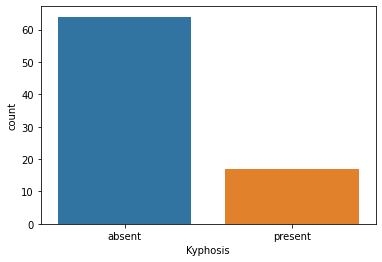

In [121]:
sns.countplot(df["Kyphosis"],label='Count')

In [122]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LabelEncoder=LabelEncoder()

df['Kyphosis']=LabelEncoder.fit_transform(kyphosis_df['Kyphosis'])



In [123]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [124]:
df_false=df[df['Kyphosis']==0]

In [125]:
df_false

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [126]:
print ('Disease absent after operation percentage = ', (len(df_false)/len(df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [127]:
x=(len(df_false)/len(df)) * 100

In [128]:
print(x)

79.01234567901234


In [129]:
100-x

20.98765432098766

In [130]:
print ('Disease absent after operation percentage = ', 100-x,"%")

Disease absent after operation percentage =  20.98765432098766 %


<AxesSubplot:>

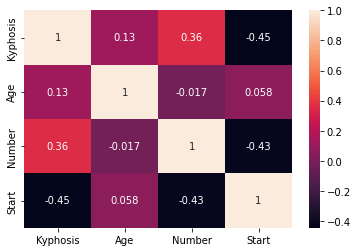

In [131]:
sns.heatmap(df.corr(),annot=True)

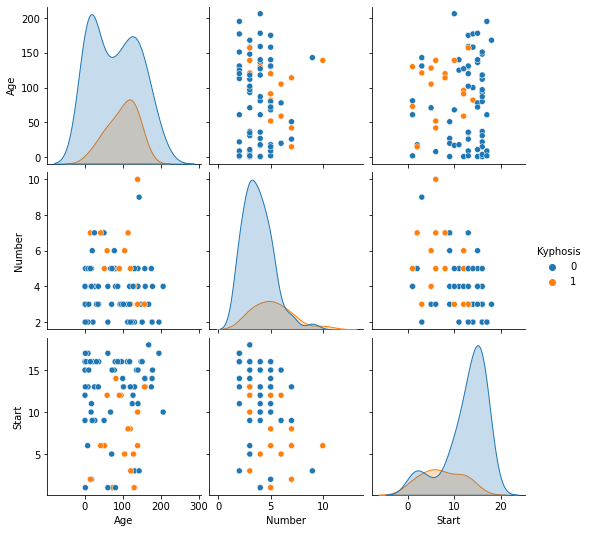

In [132]:
sns.pairplot(df,hue="Kyphosis",vars=["Age","Number","Start"])

In [133]:
x=df.drop(['Kyphosis'],axis=1)

In [134]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [135]:
y=df['Kyphosis']

In [136]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [138]:
x_train.shape

(64, 3)

In [139]:
y_train.shape

(64,)

In [140]:
x_test.shape

(17, 3)

In [141]:
y_test.shape

(17,)

In [142]:
df.shape

(81, 4)

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
model=DecisionTreeClassifier()

In [145]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
y_predict_test=model.predict(x_test)

In [148]:
y_predict_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [149]:
y_test

26    0
15    0
73    0
27    0
29    0
79    1
78    0
43    0
74    0
33    0
46    0
28    0
45    1
10    1
47    0
18    0
40    1
Name: Kyphosis, dtype: int32

In [150]:
cm=confusion_matrix(y_test,y_predict_test)

In [151]:
cm

array([[12,  1],
       [ 3,  1]], dtype=int64)

<AxesSubplot:>

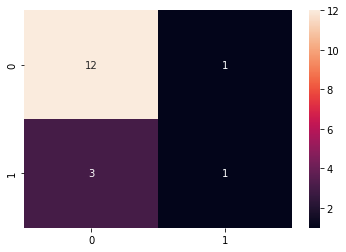

In [152]:
sns.heatmap(cm,annot=True)

In [153]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.50      0.25      0.33         4

    accuracy                           0.76        17
   macro avg       0.65      0.59      0.60        17
weighted avg       0.73      0.76      0.73        17



In [154]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [155]:
y_predict=model.predict(x_test)

<AxesSubplot:>

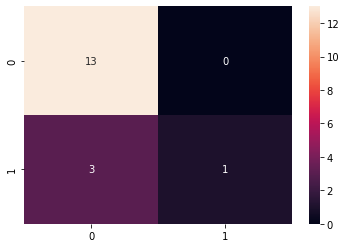

In [156]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [157]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17

